# 1. Functions EDA/Machine Learning

## 1.1. Categorical Data

In [797]:
def uniqueCategories(data):
    for i in list(data.columns):
        if data[i].dtype == 'O':
            print(data[i].unique())

def categoriesNames(data):
    for i in list(data.columns):
        if data[i].dtype == 'O':
            print(data[i].name)
            
def uniqueValues(data):
    for i in list(data.columns):
        print(f"{data[i].name}, {data[i].dtype}, {len(data[i].unique())}")

## 1.2. Outliers

In [821]:
from scipy.stats import stats
import numpy as np

def outliers(data, action):
    
    # action = ["show","nan","quantile"]
    
    qnt = np.quantile(data, q=[0.25,0.75])
    iqr = 3 * stats.iqr(data, nan_policy="omit")
    qnt_1 = qnt[0] - iqr
    qnt_3 = qnt[1] + iqr
    
    if action == "show":
             
        print(data.iloc[np.where((data>qnt_3) | (data<qnt_1) )])
        
    elif action == "nan":
        data = np.where((data>qnt_3), np.nan, data)
        data = np.where((data)<qnt_1, np.nan, data)
        return data
             
    elif action == "quantile":
        data = np.where((data>qnt_3), np.quantile(data, q=0.75)*1.5, data)
        data = np.where((data<qnt_1), np.quantile(data, q=0.25)/1.5, data)
        return data 
    

## 1.3 Cramer V

In [25]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(x, y):
    
    if x.dtypes != "O":
        x = pd.cut(x, bins=5)
        
    if y.dtypes != "O":
        y = pd.cut(y, bins=5)
    
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


In [107]:
def cramers_v_graphic(data, target, graph=True):
    
    vc = {}
    
    for i in range(len(data.columns)):
        vc[data.iloc[:,i].name] = cramers_v(data.iloc[:,i], target)
        
    vc = pd.DataFrame.from_dict(vc,orient="index",columns=[ "CramerV"]).sort_values(by="CramerV", ascending=False)
    
    if graph == True:
        return(sns.heatmap(vc.sort_values(by="CramerV", ascending=False),annot=True,fmt='.2f'))
    else:
        return(vc)
        

# 2. Useful code

## 2.1 Imputation (MICE)

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [8]:
from sklearn.ensemble import ExtraTreesRegressor # Random Forest

# Creating the model. Yoy may change n_estimators depending on the number of variables.

imputer = IterativeImputer(
    estimator=ExtraTreesRegressor(n_estimators=3, random_state=0),
    max_iter=10,
    random_state=0
)


    Train the model:

In [ ]:
imputer.fit(data[["NaNvar","X1", "X2", "X3"]])

    Predict (imputer.transform). The output will be a numpy array so change it to a dataframe.

In [9]:
var_imputed = imputer.transform(data[["NaNvar","X1", "X2", "X3"]])
var_imputed = pd.DataFrame(data, columns=["NaNvar","X1", "X2", "X3"])

    Contrast the results, here an example of RandomForest imputation. Titanic data from Kaggle.

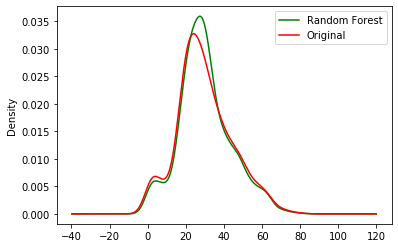

In [795]:
fig = plt.figure()
ax = fig.add_subplot(111)
age_imputed["Age"].plot(kind="kde", color="green")
titanic["Age"].dropna().plot(kind="kde", color="red")
lines, labels = ax.get_legend_handles_labels()
labels =["Random Forest","Original"]
ax.legend(lines, labels, loc='best')